In [1]:
import sklearn
import numpy as np
import pandas as pd

housing = pd.read_csv('./data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


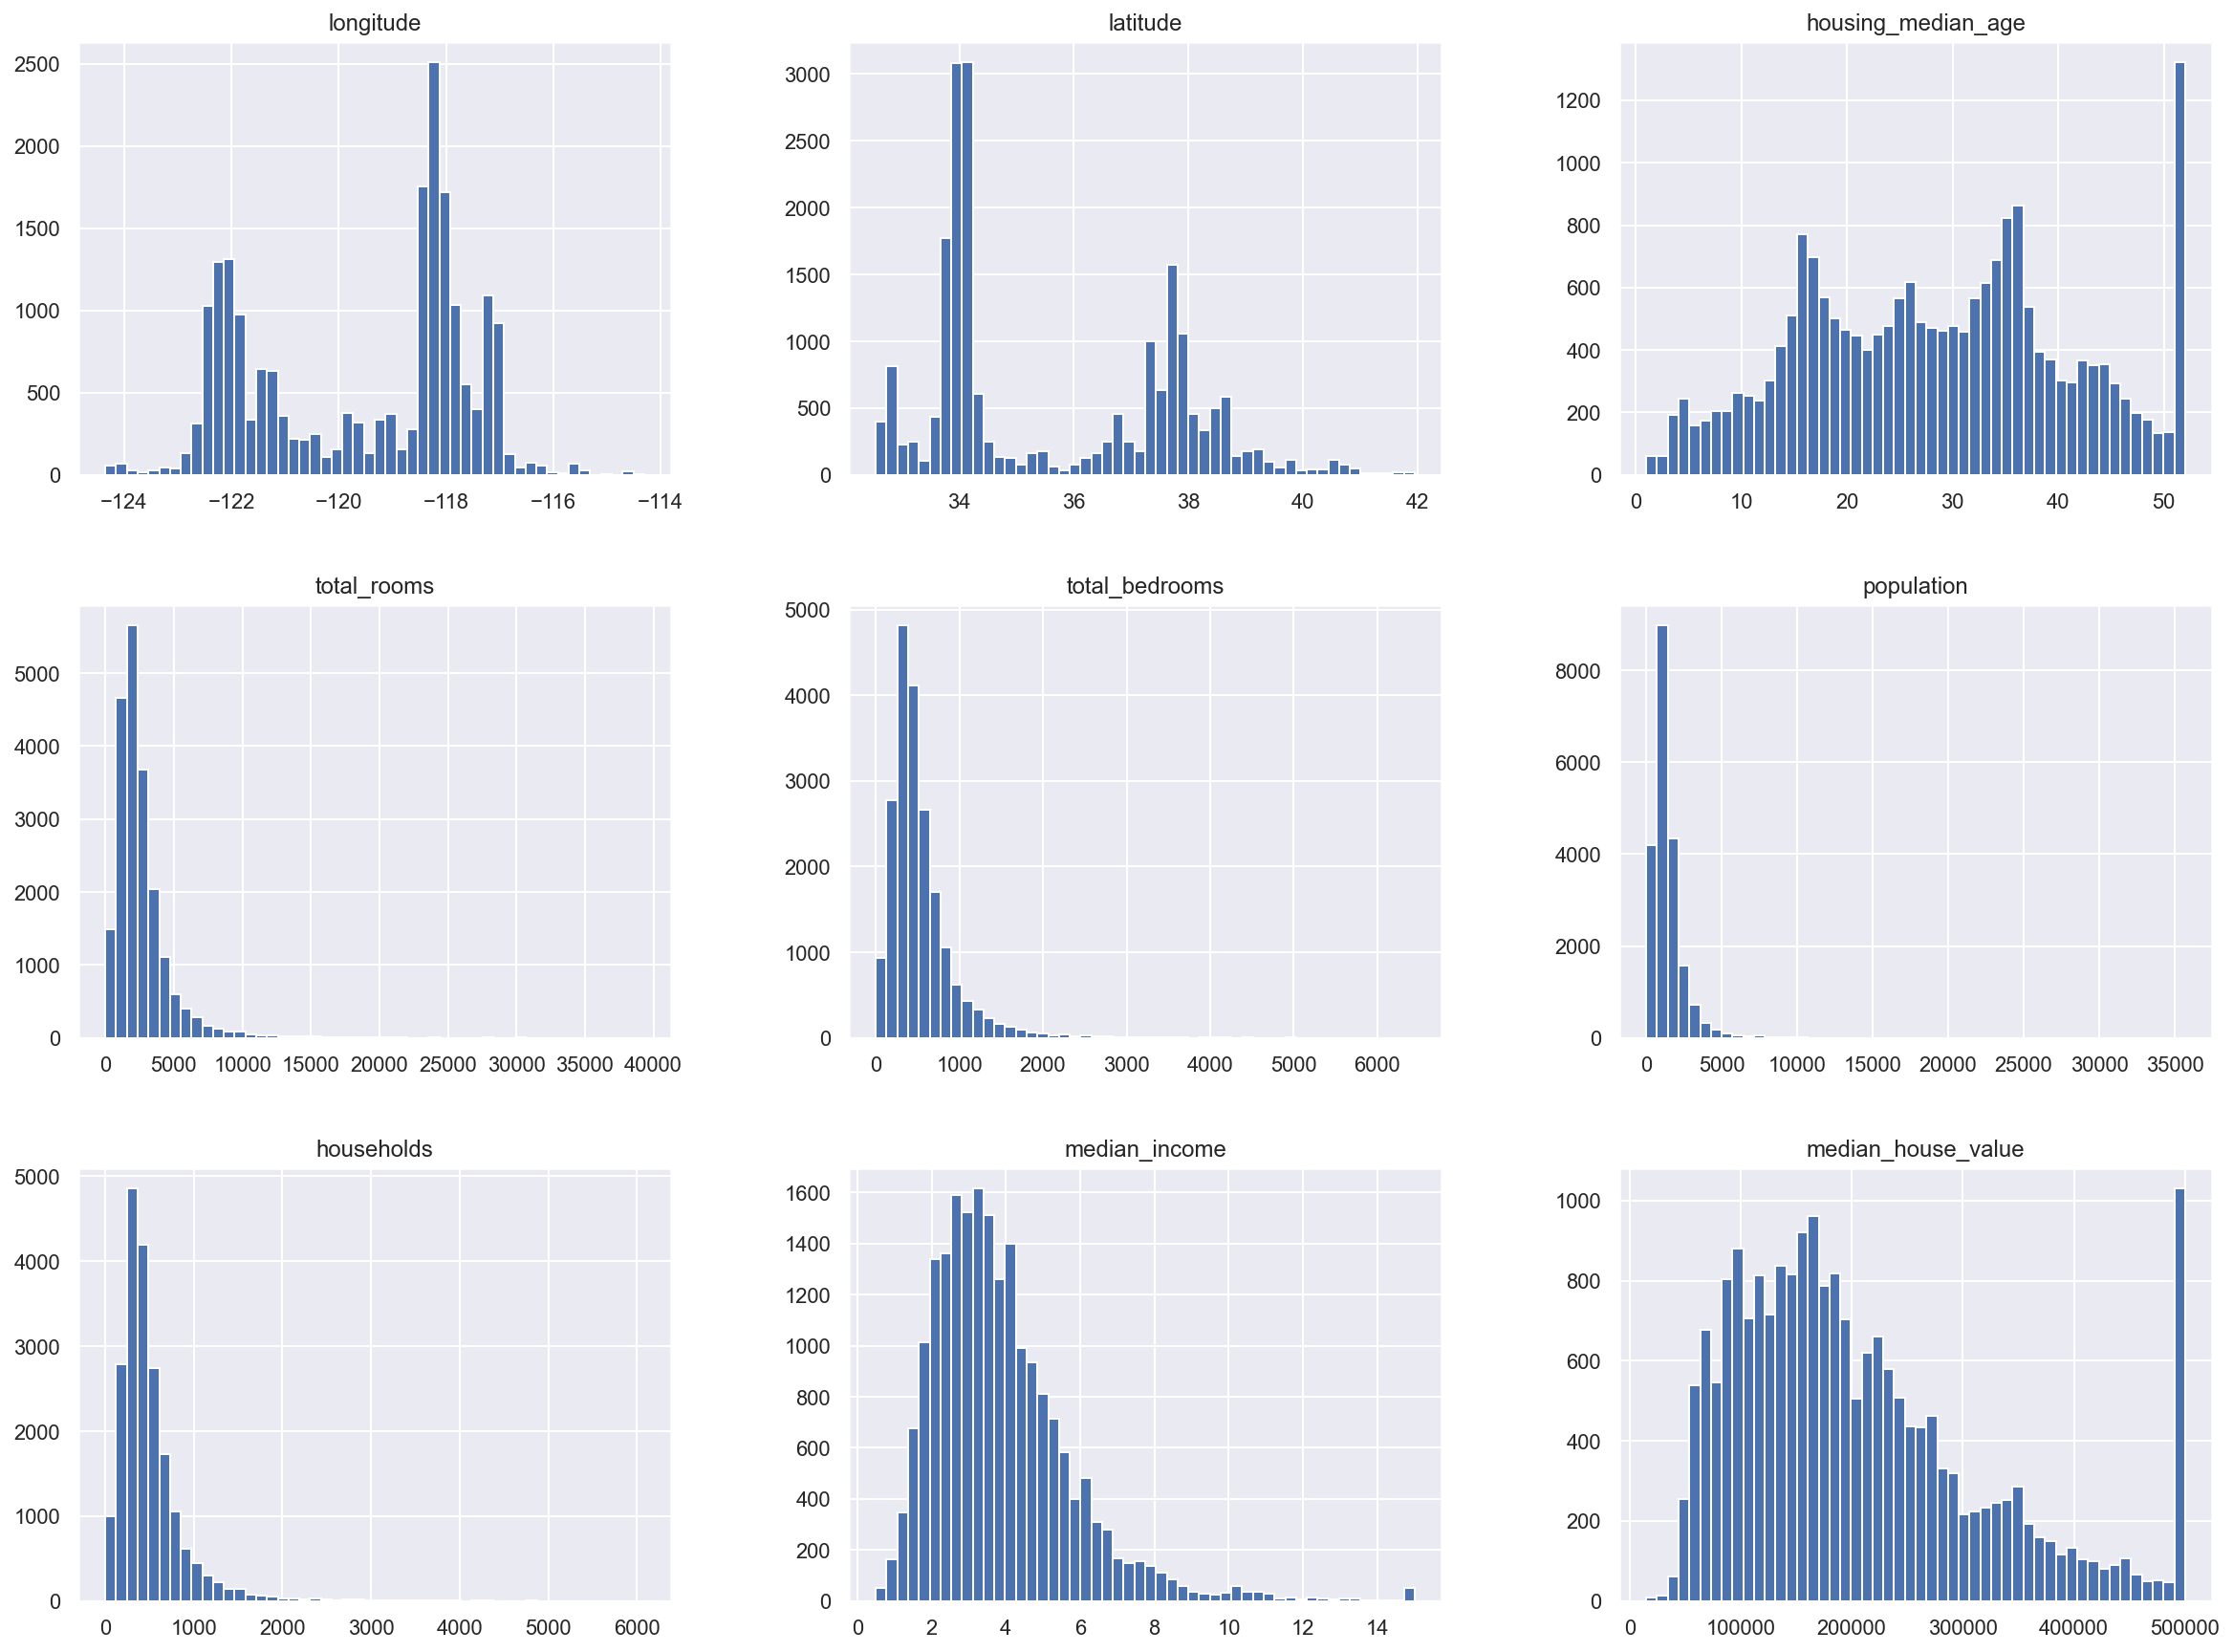

In [5]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

데이터 유의점
- median income 데이터는 0.4999와 15.001 사이 값으로 스케일링됨
- house median age와 median house value도 스케일링됨

In [6]:
# train/test 데이터 분류
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=13)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2973,-119.08,35.34,15.0,1474.0,235.0,768.0,238.0,4.1528,130100.0,INLAND
14432,-117.23,32.80,21.0,2429.0,579.0,1011.0,538.0,3.2250,229400.0,NEAR OCEAN
13916,-116.15,34.14,18.0,3312.0,705.0,1251.0,512.0,3.0139,82600.0,INLAND
18848,-122.37,41.41,28.0,1729.0,419.0,929.0,370.0,1.2700,53100.0,INLAND
2208,-119.87,36.81,6.0,1891.0,341.0,969.0,330.0,4.6726,107800.0,INLAND


<AxesSubplot:>

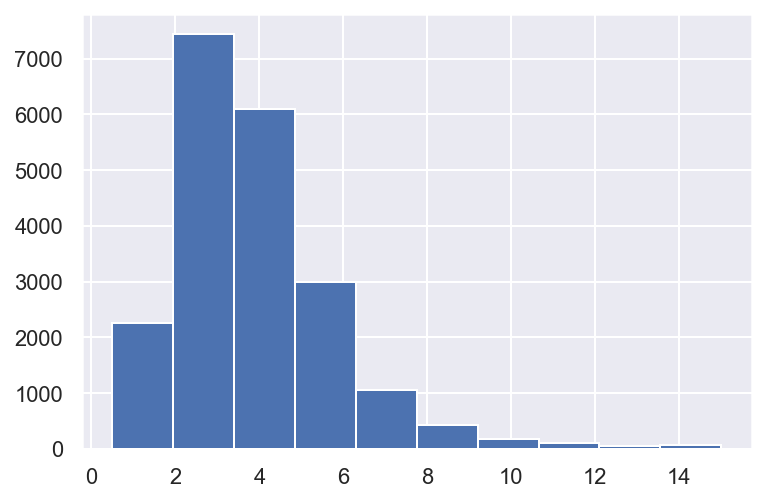

In [7]:
housing['median_income'].hist()

In [8]:
# 5구간으로 카테고리컬하게 분류
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

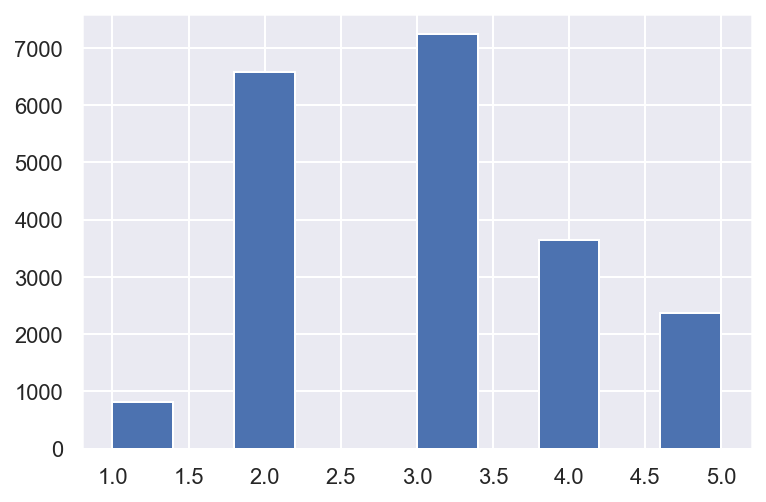

In [9]:
housing['income_cat'].hist()

In [10]:
# 소득 카테고리를 기반으로 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_idx, test_idx in split.split(housing, housing['income_cat']):
    start_train_set = housing.iloc[train_idx]
    start_test_set = housing.iloc[test_idx]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

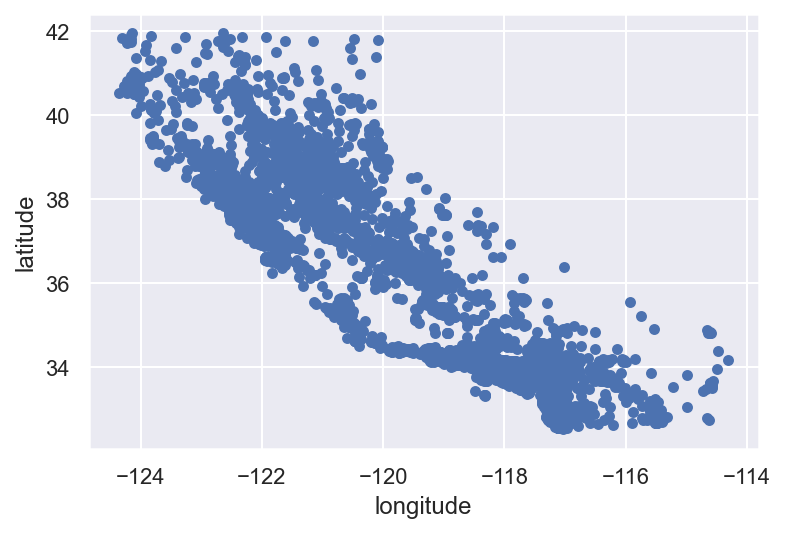

In [11]:
# 샘플링한 train 데이터 원 데이터에 넣어주고, 집 위치 그려보기
housing = start_train_set.copy()
housing.plot(kind='scatter', x='longitude', y='latitude')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

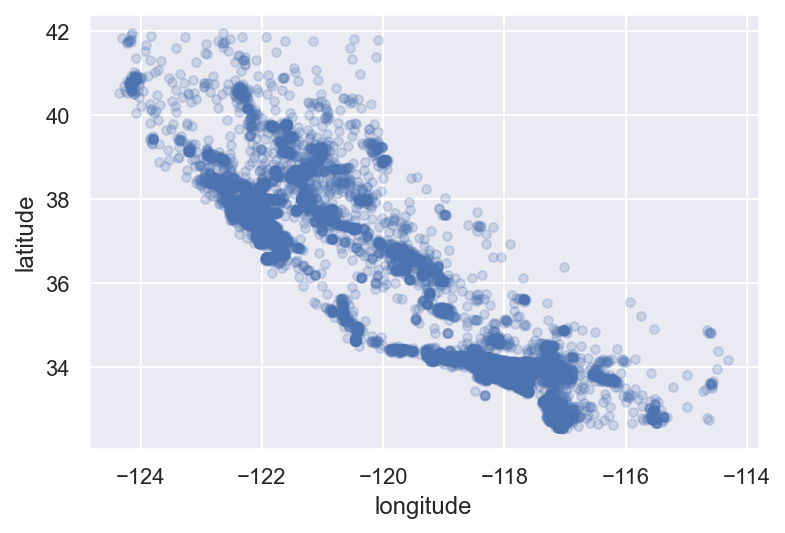

In [12]:
# 투명도를 주어 밀집도 확인
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

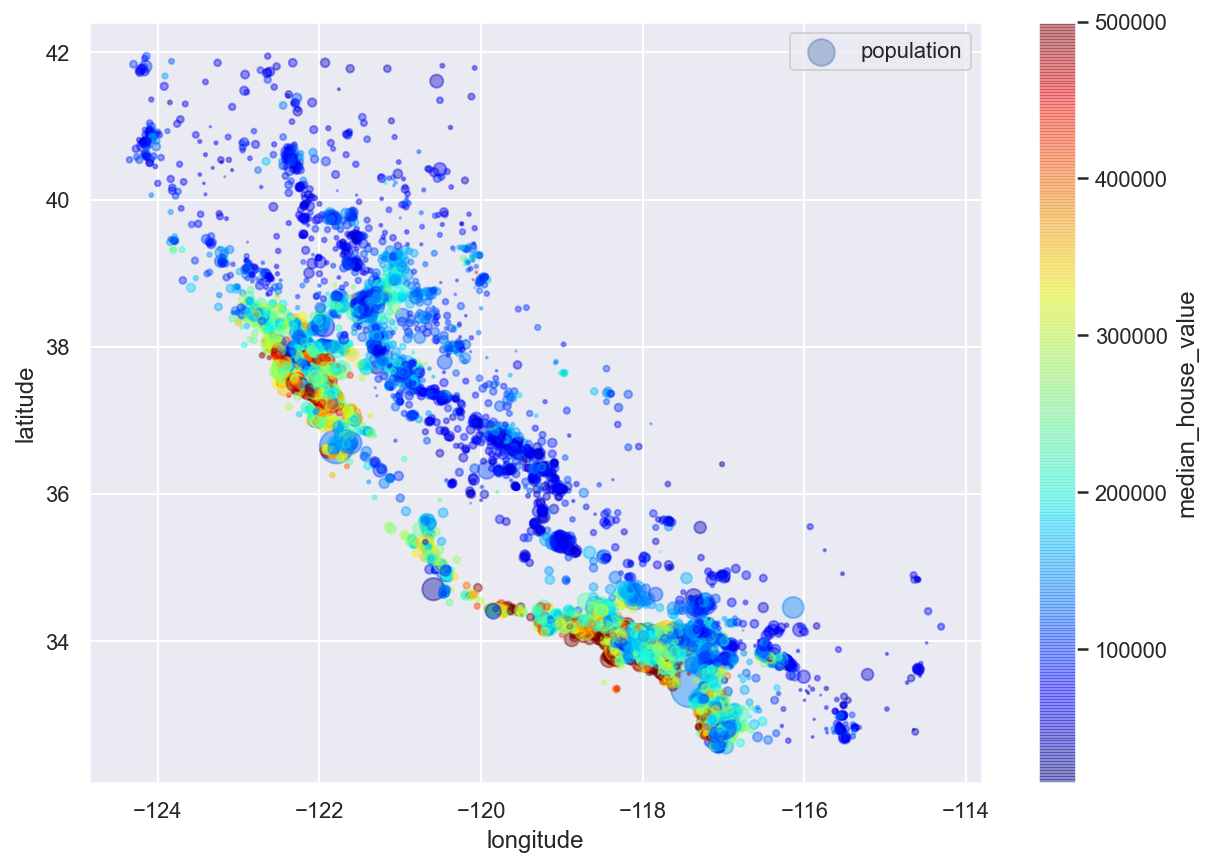

In [13]:
# 여기에서 주태가격을 색상으로 입히기
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.legend();

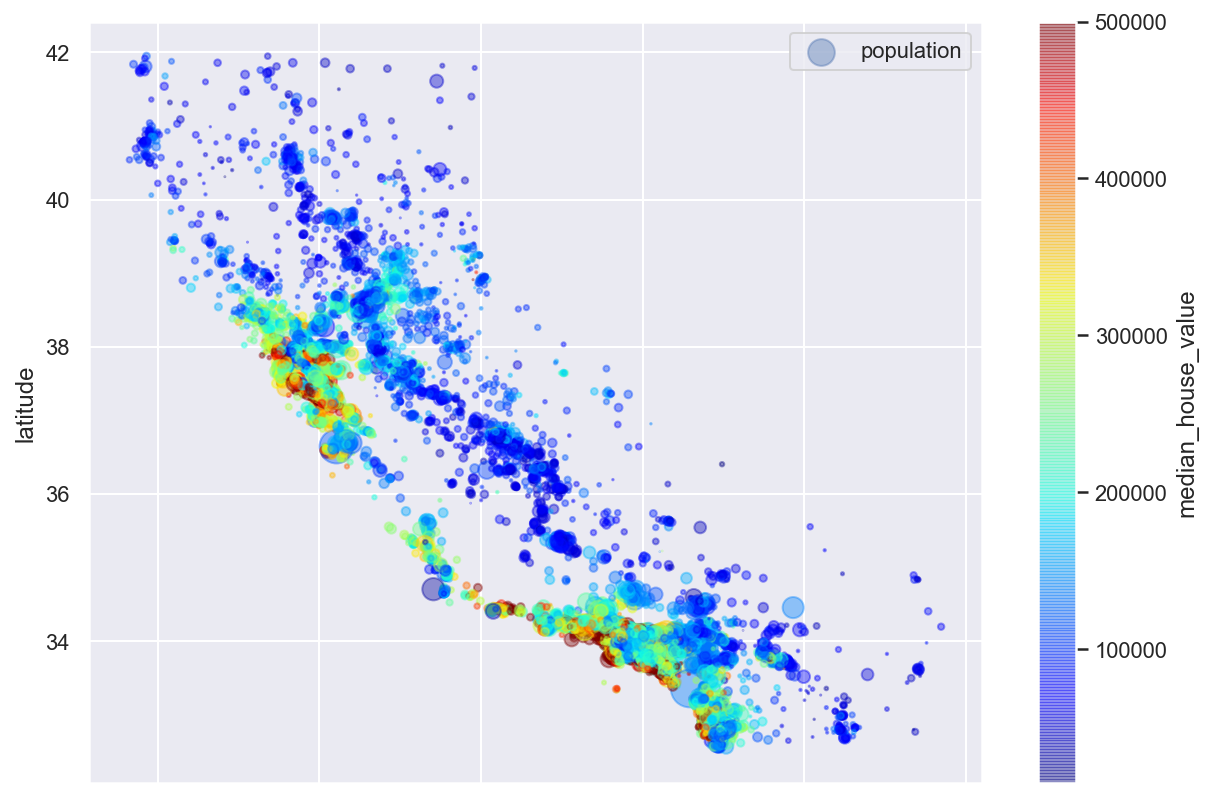

In [14]:
# 여기에서 주태가격을 색상으로 입히기
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=True)
plt.legend();

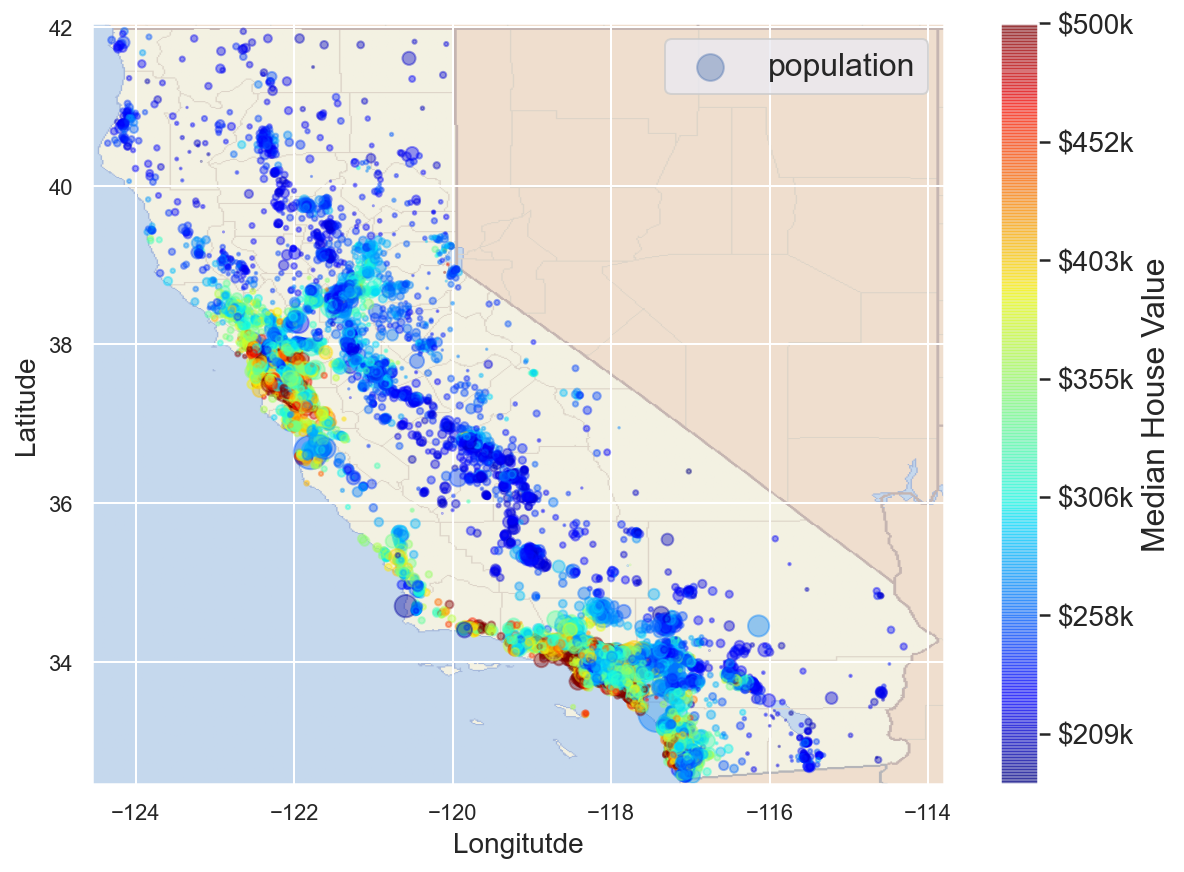

In [15]:
# 실제 캘리포니와 지도와 겹쳐보기
import matplotlib.image as mpimg
california_img=mpimg.imread('./data/california.png')
ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitutde', fontsize=14)

prices = housing['median_house_value']
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16); plt.show()

In [16]:
# 집값과 상관관계
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689000
total_rooms           0.137326
housing_median_age    0.100730
households            0.069638
total_bedrooms        0.054213
population           -0.022837
longitude            -0.041520
latitude             -0.147386
Name: median_house_value, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(0.0, 16.0, 0.0, 550000.0)

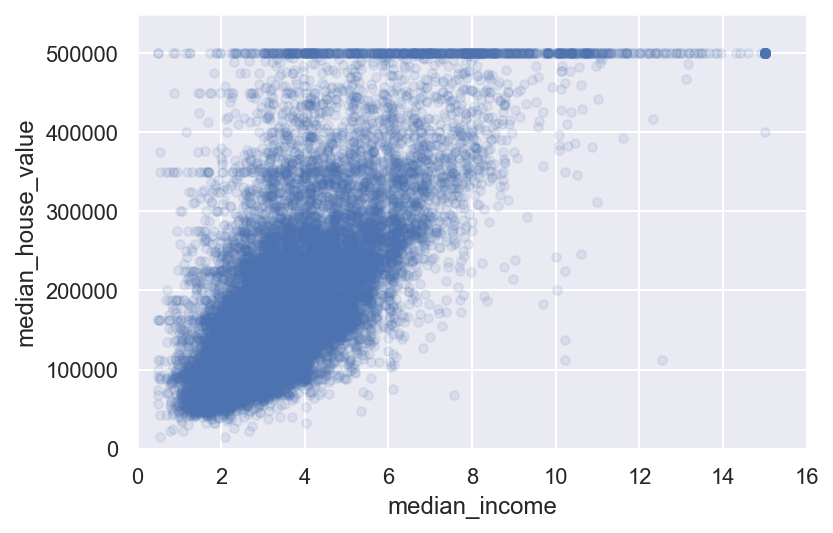

In [17]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [18]:
# 몇개의 feature 생선
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']
housing['population_per_household'] = housing['population'] / housing['households']

In [19]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689000
rooms_per_household         0.153984
total_rooms                 0.137326
housing_median_age          0.100730
households                  0.069638
total_bedrooms              0.054213
population_per_household   -0.022265
population                 -0.022837
longitude                  -0.041520
bedrooms_per_household     -0.041842
latitude                   -0.147386
Name: median_house_value, dtype: float64

In [20]:
# 레이블 데이터 분리
housing = start_train_set.drop('median_house_value', axis=1)
housing_labels = start_train_set['median_house_value'].copy()

In [21]:
# 결측치 확인
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3328,-122.72,38.88,29.0,2781.0,NaN,890.0,310.0,1.9906,INLAND,2
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,NEAR OCEAN,3
10389,-117.66,33.58,6.0,4186.0,NaN,1794.0,541.0,9.6986,<1H OCEAN,5
7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN,3
11512,-118.10,33.74,32.0,2035.0,NaN,934.0,512.0,4.2287,NEAR OCEAN,3


In [22]:
# 손쉽게 처리하는 도구 Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
3328,-122.72,38.88,29.0,2781.0,433.0,890.0,310.0,1.9906,2.0
20267,-119.19,34.20,18.0,3620.0,433.0,3171.0,779.0,3.3409,3.0
10389,-117.66,33.58,6.0,4186.0,433.0,1794.0,541.0,9.6986,5.0
7668,-118.08,33.92,38.0,1335.0,433.0,1011.0,269.0,3.6908,3.0
11512,-118.10,33.74,32.0,2035.0,433.0,934.0,512.0,4.2287,3.0
...,...,...,...,...,...,...,...,...,...
5665,-118.29,33.73,30.0,3161.0,433.0,1865.0,771.0,2.7139,2.0
4667,-118.29,34.05,34.0,1102.0,433.0,1325.0,439.0,1.5972,2.0
14930,-117.02,32.66,19.0,771.0,433.0,376.0,108.0,6.6272,5.0
5723,-118.23,34.18,45.0,2332.0,433.0,943.0,339.0,8.1132,5.0


In [23]:
# 카테고리 데이터는 인코딩
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
20224,NEAR OCEAN
13718,INLAND
8156,<1H OCEAN
17282,NEAR OCEAN
523,NEAR BAY


In [24]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [26]:
# 희소행렬이 싫다면 이렇게
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

#### 변환기 만들기

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
        # 아무것도 하지 않음
    
    def transfrom(self, X):
        rooms_per_housholds = X[:, rooms_ix] / X[:, households_ix]
        population_per_housholds = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, population_ix] / X[:, population_ix]
            return np.c_[X, rooms_per_housholds, population_per_housholds,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_housholds, population_per_housholds]

In [44]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transfrom(housing.to_numpy())

In [45]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
                                     columns=list(housing.columns)+["rooms_per_households", "population_per_households"],
                                    index=housing.index)
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_households,population_per_households
20224,-119.3,34.29,41,1445,410,1052,388,2.6333,NEAR OCEAN,2,3.72423,2.71134
13718,-117.19,34.08,5,4458,751,2392,773,4.5938,INLAND,4,5.76714,3.09444
8156,-118.11,33.82,37,1756,345,836,335,4.375,<1H OCEAN,3,5.24179,2.49552
17282,-119.73,34.42,25,2024,312,907,335,5.4127,NEAR OCEAN,4,6.04179,2.70746
523,-122.24,37.77,52,1153,235,481,223,2.6411,NEAR BAY,2,5.1704,2.15695
...,...,...,...,...,...,...,...,...,...,...,...,...
11351,-117.91,33.76,20,4413,NaN,4818,1063,2.8594,<1H OCEAN,2,4.15146,4.53246
9958,-122.33,38.39,36,831,122,272,109,6.3427,INLAND,5,7.62385,2.49541
7008,-118.06,33.97,39,1639,300,988,309,3.9612,<1H OCEAN,3,5.30421,3.19741
18040,-121.97,37.23,22,2781,523,1291,516,4.6065,<1H OCEAN,4,5.38953,2.50194


#### 파이프라인 만들기

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'CombinedAttributesAdder()' (type <class '__main__.CombinedAttributesAdder'>) doesn't

#### 지금까지 수행한 숫자형과 범주형 컬럼의 핸들링을 한 번에 실시

In [38]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

NameError: name 'num_pipeline' is not defined